In [1]:
import os
import os.path as osp
import sys
sys.path.insert(0, osp.dirname(osp.abspath('.')))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
from torch.utils.data import DataLoader
import torchvision.transforms as T
from torchvision.datasets import ImageFolder
from torchvision.models import resnet18, resnet34

## Hyperparameters

In [3]:
DEVICE = "cuda:1"
IMG_SIZE = (224, 224)
IMG_ROOT = '/home/advattack/imagenet/ILSVRC_KAGGLE/sampled_imagenet/'

## Dataset

In [4]:
# Forward Transform
transform = T.Compose([
    T.Resize(256),
    T.CenterCrop(IMG_SIZE),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])

# Backward Transform
inverse = T.Compose([
    T.Normalize(mean=[0., 0., 0.],
                std=[1/0.229, 1/0.224, 1/0.225]),
    T.Normalize(mean=[-0.485, -0.456, -0.406],
                std=[1., 1., 1.]),
    T.ToPILImage()
])

In [5]:
dataset = ImageFolder(root=IMG_ROOT, transform=transform)

subsets = {}
for img, label in dataset:
    if label not in subsets:
        subsets[label] = []
    subsets[label].append(img.numpy())
    
# Split dataset to several subsets
for label in subsets.keys():
    subsets[label] = torch.tensor(subsets[label])

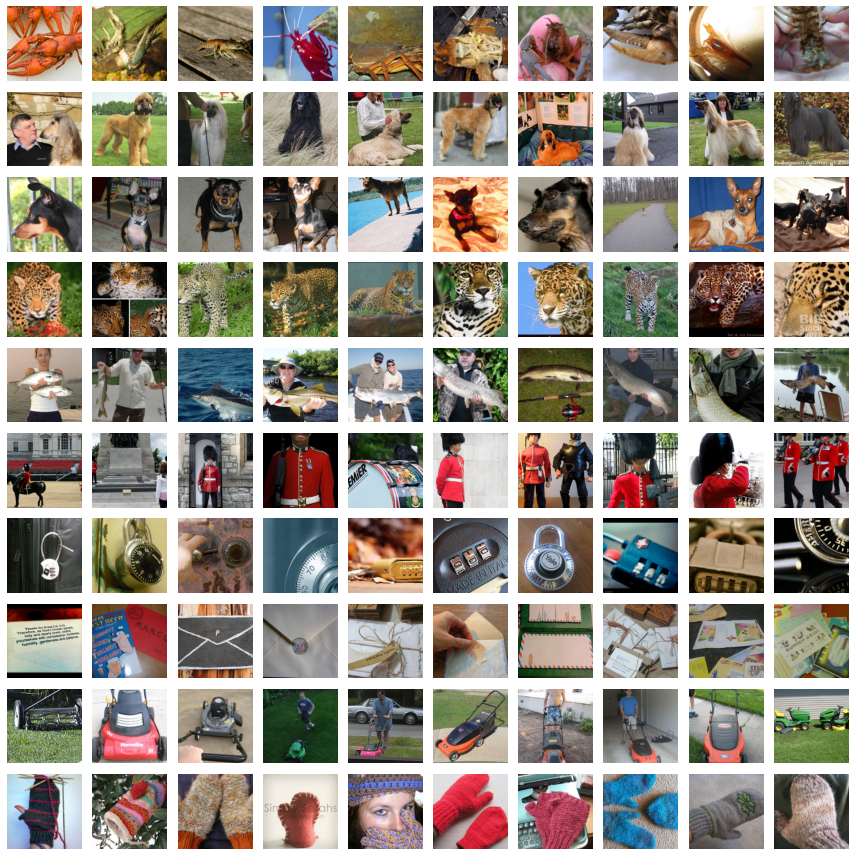

In [6]:
nrows = len(subsets.keys())
ncols = len(subsets[0])

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 12))
for i in range(nrows):
    for j in range(ncols):
        img = inverse(subsets[i][j])
        img = np.array(img)
        axes[i][j].imshow(img)
        axes[i][j].set_axis_off()
        
plt.tight_layout()

## Load Pretrained Resnet18

In [7]:
model = resnet18(pretrained=True)
model = model.to(DEVICE)
model = model.eval()

In [8]:
for label, samples in subsets.items():
    samples = samples.to(DEVICE)
    outputs = model(samples)
    preds = torch.max(outputs, 1)[1]
    print(label, preds)

0 tensor([122, 124, 124, 124, 118, 123, 124,  70, 314, 124], device='cuda:1')
1 tensor([160, 160, 160, 160, 160, 160, 160, 160, 160, 160], device='cuda:1')
2 tensor([236, 237, 237, 237, 227, 237, 237, 238, 237, 237], device='cuda:1')
3 tensor([288, 288, 288, 290, 288, 290, 290, 290, 290, 290], device='cuda:1')
4 tensor([389, 391,   2, 389, 389, 389, 758, 389, 389, 389], device='cuda:1')
5 tensor([439, 682, 439, 439, 541, 439, 439, 439, 439, 439], device='cuda:1')
6 tensor([507, 507, 771, 507, 507, 507, 507, 507, 507, 507], device='cuda:1')
7 tensor([549, 549, 425, 549, 315, 549, 549, 315, 549, 922], device='cuda:1')
8 tensor([621, 621, 872, 621, 621, 621, 621, 621, 621, 621], device='cuda:1')
9 tensor([658, 658, 658, 793, 824, 658, 878, 806, 658, 658], device='cuda:1')
